In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [46]:
img = cv2.imread('camera_cal/calibration2.jpg')

In [47]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

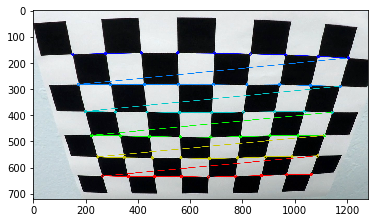

In [56]:
nx = 9
ny = 6

# Create objectpoints, imagepoints
objpoints = []
imgpoints = []

objp = np.zeros((nx * ny, 3), np.float32)
objp= np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)


ret, corners = cv2.findChessboardCorners(gray_img,(nx,ny),None)
# print(ret,cornors)
if ret == True:
    #Draw Point 
    cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
    
    objpoints.append(objp)
    imgpoints.append(corners)
    
    
    plt.imshow(img)
else:
    plt.imshow(img)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)